## Project Objective
The goal of this analysis is to explore Steam market dynamics and identify pricing and engagement patterns that can support data-driven decision-making for future game releases.


# 💻 Business Context

### 👔 Client Company: 
PixelForge Studios operates as a medium-sized game development firm that produces interactive independent PC games for its target market. The company achieved market success with their past titles but strives to increase their market presence while enhancing profit potentials for upcoming releases.

### Why Does PixelForge Studios Need a Data Scientist?
The digital platform Steam now observes thousands of new game releases annually because the gaming industry maintained intense competition. PixelForge Studios seeks to base their next game release decisions on data analytics approaches for increased outcomes of market success. The data science consultancy received an approach from PixelForge Studios for analyzing Steam gaming market trends.

### What Examinations Are Needed?
The organization must determine several key points through their research.

The gaming market shows what significant changes occurred during the recent ten-year period.
The company needs to understand which price points lead to superior sales performance while obtaining positive reviews.
Several elements influence whether video games will become successful according to industry standards.
Games with longer length receive diverse feedback from users in terms of review scores.
A competitive study evaluates how successful games perform against typical ones.

###  ✍🏼 Dataset Overview
A dataset consisting of Steam game information from 2013 through 2023 provides the necessary data to solve these questions. The dataset includes:

Game titles and release dates
Pricing information
Sales estimates
Users provide both affirmative and negative evaluations that affect the review count.
Playtime duration estimates

### ⬇️ Import Required Libraries
Before exploring the data, let's import the necessary libraries to our notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### 🗂️ Data Exploration
The next stage includes dataset loading which allows evaluation of missing data and distribution along with quality identification.

In [2]:
df = pd.read_csv('games.csv')
df_backup = df.copy() 
print(f'Our data has {df.shape[0]} rows and {df.shape[1]} columns')
df.head()


Our data has 60952 rows and 9 columns


,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single
0,Train Bandit,"Oct 12, 2017",0.99,53,5,655370,0,20000,NaN
1,Henosis™,"Jul 23, 2020",5.99,3,0,1355720,0,20000,NaN
2,Two Weeks in Painland,"Feb 3, 2020",0.00,50,8,1139950,0,20000,NaN
3,Wartune Reborn,"Feb 26, 2021",0.00,87,49,1469160,50000,100000,NaN
4,TD Worlds,"Jan 9, 2022",10.99,21,7,1659180,0,20000,NaN


### ☑️ Dataset Overview

The analysis will use a time span from 2013 through 2023 which contains information about games on Steam. 
The dataset incldudes game features:

* Game titles and release dates
* Pricing information
* Sales estimates
* The positive and negative reviews of the users.
* Playtime duration estimates

Through explanatory data analysis our team will render effective recommendations that enable PixelForge Studios to optimize their forthcoming game releases.

### 🔍 Data Exploration
* The dataset contains 60,952 games and 9 features.

First of all the 'hltb_single' (playtime duration) column has some missing values (marked as NaN). Lets see how many.

In [3]:
missing_hltb = df["hltb_single"].isnull().sum()
print(f"There are {missing_hltb} missing values for playtime duration feature.")

There are 47980 missing values for playtime duration feature.


* I will now check for the datatypes if they are correct and also, number of games without sales.

In [4]:
print(df.dtypes) 
no_sales_count = ((df["min_owners"] == 0) & (df["max_owners"] == 0)).sum() 
print(f'\n Number of games without sales: {no_sales_count}')


name             object
release_date     object
price           float64
positive          int64
negative          int64
app_id            int64
min_owners        int64
max_owners        int64
hltb_single     float64
dtype: object

 Number of games without sales: 0


* Let's also check unique values in each column.

In [5]:
for i in df.columns:
    print(i, ':', len(df[i].unique()))

name : 60571
release_date : 3552
price : 476
positive : 4153
negative : 2110
app_id : 60952
min_owners : 13
max_owners : 13
hltb_single : 94


* Next step is for analyzing the game prices and the games that are expensive than $150.

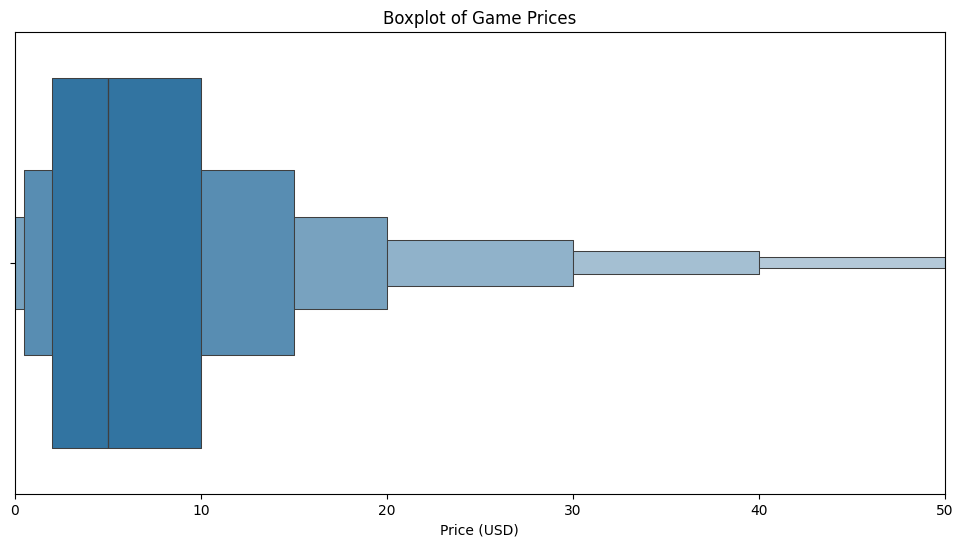

Number of games priced above $150: 19


In [6]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x=df["price"])
plt.title("Boxplot of Game Prices")
plt.xlabel("Price (USD)")
plt.xlim(0, 50)
plt.show()
price_outliers = df[df["price"] > 150]
print(f"Number of games priced above $150: {price_outliers.shape[0]}")

* Now we can check if are there any developer tests. Developer tests are games which has 0 reviews and 0 max owners. We can remove the extreme outliers from positive reviews and also the games that have 0 positive reviews.

In [7]:
developer_tests = df[(df["max_owners"] == 0) & (df["positive"] == 0) & (df["negative"] == 0)]
print(f"Number of developer test games: {developer_tests.shape[0]}")
df_filtered  = df[(df["positive"] > 0) & (df["positive"] <= 500000)]

Number of developer test games: 0


In [8]:
df[df["positive"] == 0].shape[0]

2074

### 🧹 Data Cleaning
* The dataset contains 47980 null values as its first issue. We should skip both median calculation and missing value replacement because this task requires an exact trend analysis.

* The data type of 'release_date' needs conversion for any time-based assessment.


In [9]:
df_playtime = df.dropna(subset=["hltb_single"]) 
df["release_date"] = pd.to_datetime(df["release_date"], errors ="coerce") 
missing_dates = df["release_date"].isna().sum() 
print(f"Number of missing or invalid dates after conversion: {missing_dates}") 


Number of missing or invalid dates after conversion: 100


* Since we only have 100 missing values (dates), we can remove them from our data. If we don't remove it, it will affect our analysis.

In [10]:
df = df.dropna(subset=["release_date"])
check_removed_dates = df["release_date"].isna().sum() 
print(f"There are {check_removed_dates} missing or invalid dates after removing them.")

There are 0 missing or invalid dates after removing them.


* For the price outliers, let's remove the games priced above $150. ( We already checked it at the data exploration and we have 19 games over $150 .)

In [11]:
df = df[df["price"] <= 150]
print(f"Number of games priced above $150: {df[df["price"] > 150].shape[0]}")

Number of games priced above $150: 0


* Since we have 0 developer test games, We can continue with the final data cleaning review. At this part I am going to check if we have any missing values (NaN), negative or invalid values and duplicate rows.

In [12]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  

hltb_single    47891
dtype: int64


* Our data is now ready to analyze and find answers for the business questions.

## 1️⃣ Business Question: What is the competition trend over the years?
### 📌 Why is this important?
Understanding game release trends helps PixelForge Studios identify:
- The studio needs to examine if  game releases decrease or increase in number by years.
- To understand, when the competition reached its peak.
- If there are specific years with a surge in new releases.

We will visualize the number of games released per year.

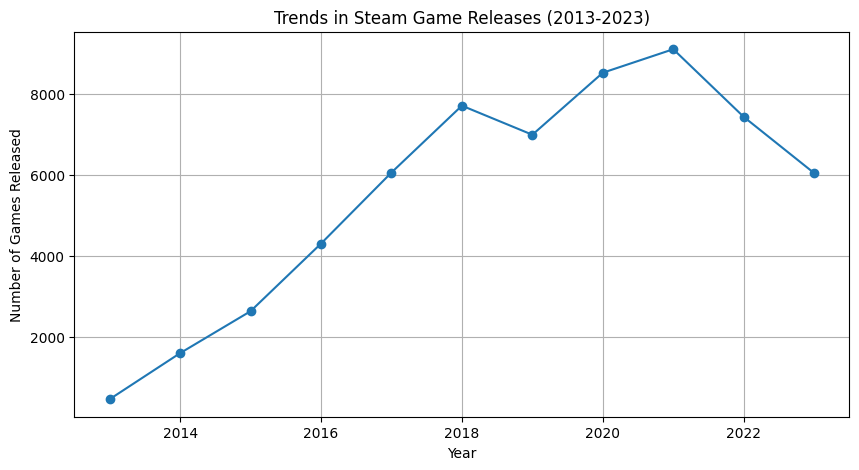

In [13]:
games_per_year = df["release_date"].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(games_per_year.index, games_per_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.title("Trends in Steam Game Releases (2013-2023)")
plt.grid(True)
plt.show()

### 🔍 Overview:
- **2021** is the year with the highest competition.
- While game releases were on a steady rise until 2021, it then fell and competition decreased. This clears it is a good time to release a new game.
- The number of released games reached its peak during the time period from 2016 through 2021.
- PixelForge Studios should consider that players may now prioritize quality over quantity. So focus on well-made games instead of mass-producing games.


## 2️⃣ Business Question: What is the most common price range for Steam games?
### 📌 Why is this important?
- Identifying **popular price points** helps in setting an **optimal game price**.
- We will visualize the **distribution of game prices** and identify common price categories.


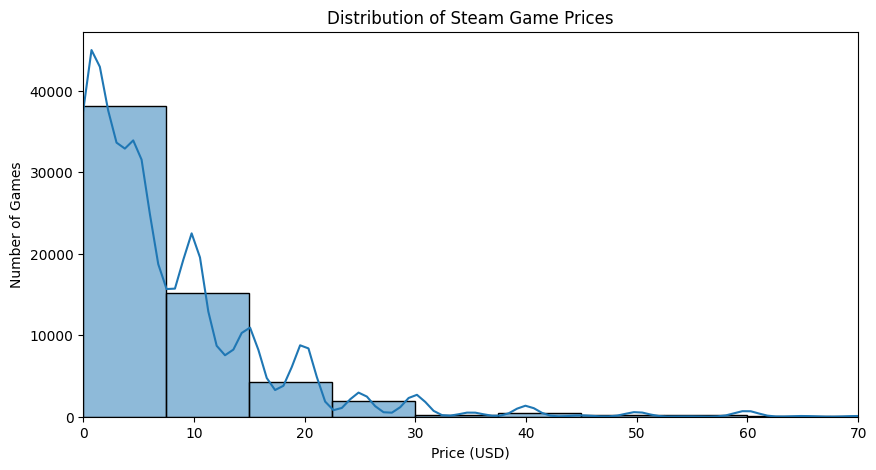

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df["price"], bins=20, kde=True)
plt.xticks(np.arange(0, df["price"].max() + 10, 10))  
plt.xlabel("Price (USD)")
plt.ylabel("Number of Games")
plt.title("Distribution of Steam Game Prices")
plt.xlim(0, 70)
plt.show()

### 🔍 Overview:
- Most of the games available on Steam cost **less than $20** while plenty of them offer **free** gameplay.
- The price strategies at **$9.99 and $19.99** create a large concentration in the market because these price points are commonly used.
- **PixelForge Studios** should consider providing affordable prices to extend their audience potential since their expensive games appear less frequently.


## 3️⃣ Business Question: Do higher priced games receive more positive reviews?
### 📌 Why is this important?
- Games with higher prices tend to satisfy **higher quality** standards and achieve **better sales** expectations.
- Our research investigates whether **high-cost video games** gain **better review ratings** than other games.
- The evaluation of premium pricing needs at **PixelForge Studios** depends on this information.


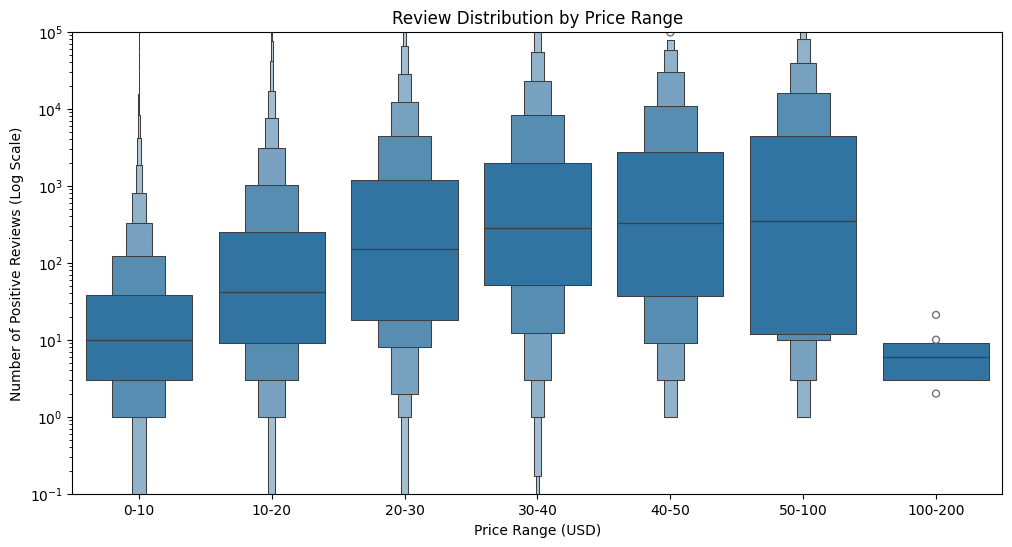

In [15]:
plt.figure(figsize=(12, 6))

# Grouping prices to get a better view.
df["price_bins"] = pd.cut(df["price"], bins=[0, 10, 20, 30, 40, 50, 100, 200], labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-100", "100-200"])

sns.boxenplot(x=df["price_bins"], y=df["positive"])
plt.yscale("log")
plt.xlabel("Price Range (USD)")
plt.ylabel("Number of Positive Reviews (Log Scale)")
plt.title("Review Distribution by Price Range")
plt.ylim(0.1, 100000)
plt.show()

### 🔍 Examinatiom from the Boxplot:
1️⃣ The number of positive reviews increases when the price goes up and maintains its growth until reaching a maximum threshold point. 
   Video games falling between $50 to $100 maintain the highest positive review rating together with broadest review distribution.  
   The number of reviews significantly decreases for video games priced more than $100.  
   Games which exceed $100 in price seem to attract a limited audience yet games priced below $100 yield enhanced consumer interest.

2️⃣ There is substantial volatility in the reviews received by free-to-play and games priced at a low cost. 
   Games at $0-10 exhibit lower median scores among players yet include numerous solid block ratings.
   A significant number of free-to-play games receive poor reviews because the popularity of popular free-to-play games stands out from the remaining lower-rated offerings.

3️⃣ The cost of a product does not directly lead to excellent customer evaluations.
   The higher the game price becomes the more review attention it receives when delivering excellent quality.  

   ---

### 📌 Business Recommendations for PixelForge Studios:
✅ **Price sweet spot:**
   The review scores match up with the estimated $10-50 price bracket that attracts abundant player engagement.  
   A game priced at $20-40 can achieve the most extensive audience reach according to business projections.  

✅ **Price games above $100 only when serving a distinct market segment.**  
   Reviews decrease dramatically after a game exceeds a $100 price point because most gamers keep away from these higher cost titles.  
   PixelForge Studios should provide intense advertising and distinctive features to Support the high price point when developing premium games.

✅ **A combination game design using Free-to-play with the option to buy in-game items should be considered.** 
   According to research free-to-play games achieve high-player engagement thus PixelForge Studios might implement a free foundational version with premium elements.



## 4️⃣ Business Question 4: Which video games have the largest number of owners?
### 📌  Why is this important?
- Finding **best-selling games** can reveal trends in **popular game genres**.
- This helps in **deciding what type of game to develop next**.
- We will look at the **top 10 games based on max_owners**.

In [16]:
top_games = df.sort_values(by="max_owners", ascending=False).head(10)
display(top_games)


,name,release_date,price,positive,negative,app_id,min_owners,max_owners,hltb_single,price_bins
14576,Dota 2,2013-07-09,0.00,1477153,300437,570,100000000,200000000,NaN,NaN
7419,PUBG: BATTLEGROUNDS,2017-12-21,0.00,1154655,895978,578080,50000000,100000000,NaN,NaN
5871,New World,2021-09-28,39.99,154914,73900,1063730,50000000,100000000,NaN,30-40
32633,PAYDAY 2,2013-08-13,9.99,520826,62574,218620,20000000,50000000,23.0,0-10
29071,Rust,2018-02-08,39.99,703687,108223,252490,20000000,50000000,NaN,30-40
47480,Grand Theft Auto V,2015-04-13,29.98,1171197,210154,271590,20000000,50000000,31.0,20-30
26252,Warframe,2013-03-25,0.00,442724,48241,230410,20000000,50000000,NaN,NaN
27200,ELDEN RING,2022-02-24,59.99,460812,51238,1245620,20000000,50000000,50.0,50-100
14080,War Thunder,2013-08-15,0.00,246926,67506,236390,20000000,50000000,NaN,NaN
621,Apex Legends™,2020-11-04,0.00,415524,66608,1172470,20000000,50000000,NaN,NaN


### **📊 Analysis from the Top 10 Best-Selling Games:**
1️⃣ **Free-to-Play Games Dominate the Top**  
   - There are many free to play games at the top selling games. (Dota 2, PUBG, Warframe and etc.)
   - The **free-to-play model** drives huge user engagement because players spend money on **virtual purchases** in the game.

2️⃣ **Popular premium games currently exist in the price range between $30 - $60.** 
   - The top 10 best-selling games list features **Rust ($39.99), New World ($39.99), GTA V ($29.98)** and the latest entry **ELDEN RING ($59.99)**.
   - The gaming market demonstrates that customers are prepared to make investments for **AAA-quality games as well as multiplayer experiences.**

3️⃣ **The games which receive high ratings from users tend to maintain active player base participation.**  
   - The multiplayer games **Dota 2 and PUBG** together with **Rust** have received hundreds of thousands of **favorable player reviews.**
   - This shows that the importance of **publishing regular updates, multiplayer engagement and content that focuses community.**

---

### 📌 **Business Recommendations for PixelForge Studios:**
✅ **The organization should adopt a free-to-play model for its products alongside planned monetization features.**
   - PixelForge Studios can generate revenue by introducing **cosmetic items and battle passes as well as game expansions** because most **leading games** deliver content for **free.**

✅ **Producing AAA titles enables the studio to set their prices between $30 and $60.** 
   - PixelForge Studios should sell their premium experiences between **$30 up to $60** depending on the product.

✅ **Community Engagement & Longevity Matter**  
   - Games that offer players **multiplayer gamemode and up-to-date content** 
   - Games that **offer multiplayer experiences, frequent updates, or live-service elements** tend to have **high player engagement over time**.


## 5️⃣ Business Question 5: Do longer games receive better reviews?
### 📌 Why is this important?
- If **longer games** get **better reviews**, it may encourage **more extensive game content**.
- If **shorter games perform well**, it suggests **players value quality over length**.


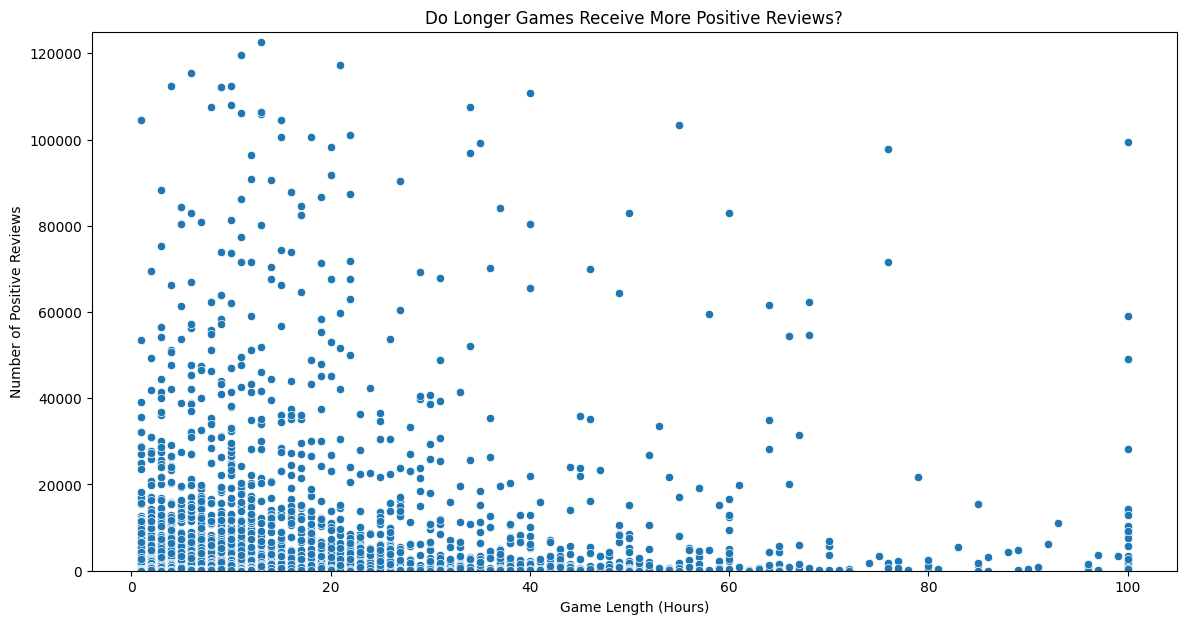

In [17]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df_filtered["hltb_single"], y=df_filtered["positive"])
plt.xlabel("Game Length (Hours)")
plt.ylabel("Number of Positive Reviews")
plt.title("Do Longer Games Receive More Positive Reviews?")
plt.ylim(0, 125000)
plt.show()


### **📊 Analysis from the Scatter Plot**
1️⃣ **No Strong Correlation Between Game Length and Positive Reviews**  
   - This visual representation indicates **different length games** manage to score both **high and low** among gamers.
   - **Game length** serves as an insufficient factor in determining what makes players **satisfied** with a game experience.


2️⃣ **The majority of popular video games feature durations less than twenty hours.** 
   - The group of games which earned **the most positive reviews** normally lasted less than **20 hours.**
   - This aligns with trends where **players prefer shorter, high-quality experiences** over long but repetitive games.

3️⃣ **Some Longer Games Do Have High Reviews**  
   - While **some longer games (50+ hours) do receive positive reviews**, they are **less common**.
   - Only **high-quality** lengthy games such as **RPGs and open-world titles** receive positive reception according to review scores.

---

### 📌 **Business Recommendations for PixelForge Studios**
✅ **Focus on Quality Over Length**  
   - The company should produce **shorter games with well-rounded engaging gameplay.**
   - Maintain **gameplay quality** which keeps players **satisfied throughout the entire playing period.**

✅ **Different game durations should match the specific genre type**
   - Long interactive gameplay exceeding **40+ hours** that exists in **RPGs and open-world titles** tends to attract players.
   - For **indie and casual game developments** it is recommended to maintain gaming duration within **20 hours.**



# 🏁 Final Discussion and Conclusion

## **📊 Summary of Findings**
Our exploratory data analysis (EDA) of Steam games (2013-2023) provided **important opinions** for PixelForge Studios.  The main discovery points include the following summary of results:

1️⃣ **Game Release Trends**  
   - Game releases reached their **highest point** during **2021** then they started to **decrease from that year**.
   - The **intense competition** during recent times requires new games to develop **distinct characteristics** which separate them from others.

2️⃣ **Pricing Strategy**   
   - Various games on Steam cost less than **$20** while **$10-50 represents the best price range for customers**.
   - **Games priced above $100 experiences limited success in drawing big player numbers**.
   - **Recommendation:** Consider **a price range between $20-40** for optimal sales and engagement.

3️⃣ **Price vs. Reviews**   
   - **Free-to-play games maintain** their position as the **leading games** regarding player engagement levels.
   - Gamers tend to purchase **premium products valuing** between **$30-60 dollars** when they deliver **superior gameplay quality**.
   - **The company should examine dual revenue streams incorporating DLC releases and battle pass mechanisms and game expansions**.

4️⃣ **Best-Selling Games and Market Success**  
   - **The multiplayer and live-service sections** of gaming account for the majority of revenue generation since PUBG and Dota 2 and Apex Legends **lead this category**.
   - **The popular single-player titles** including ELDEN RING and GTA V **achieve AAA-quality through their effective advertising strategies**.
   - The company PixelForge Studios should **analyze how multiplayer features and replay capability options** would benefit their product.

5️⃣ **Game Length vs. Positive Reviews**  
   - **No strong correlation** between game length and positive reviews.
   - The shortest games on the list of **high-rated titles** take less than **twenty hours to finish** but several lengthy games still achieve **positive reviews**.
   - We advise the studio to prioritize **outstanding quality more than game length while developing mechanics that engage players to fund operations**.

---

## **✅ Strengths of This Analysis**
🔹 **Diverse Business Questions:**  
   - This analysis covers both the **initial pricing strategies** together with **sales patterns** and **player review dynamics** and **player interaction metrics**.

🔹 **Comprehensive Data Exploration:**  
   - **The cleaned dataset** included handling missing data while identifying outliers during analysis.

🔹 **Actionable Business Recommendations:**  
   - The analysis included detailed instructions for **price strategies and natural monetization methods as well as growth plan directions**.

---

## **⚠️ Limitations of This Analysis**
❌ **Lack of Genre-Specific Analysis**  
   - The findings within this study could change depending on which **game genres researchers address**.
   - This project needs **future analysis** which examines the sales and **review influences based on different gaming genres**.

❌ **No Player Retention Data**  
   - Game reviews with positive scores **do not** necessarily lead to **consistent player commitment**.
   - The team needs to analyze the typical **gameplay duration of each title**.

❌ **External Market Factors Not Considered**  
   - External circumstances including the **COVID-19** gaming surge affect the observed trends in the market..
   - **Future Work:** Compare **global gaming trends** for better overviews.

---

## **📌 Final Recommendations for PixelForge Studios**
✅ **Optimal sales** will arise from strategic pricing between **$20-$40** for your game.  
✅ The studio should explore **free-to-play business methods** that include **cosmetic buying options and additional expansion features**.  
✅ The company should prioritize **gameplay quality** and **player engagement** instead of extending game playing duration.    
✅ **Leverage multiplayer or community-driven content** for higher retention.  

PixelForge Studios can use this **analysis to make data-based decisions that enhance their business performance in the heated gaming industry**.

---

